# Bank Marketing Campaign
### Alyssa Hubiak and Nasibul Hossain

Project Goal: Develop a model to predict whether a customer is likely to buy the bank's product or not. This
will help ABC Bank determine where to focus their marketing for their new term deposit
product. This will need to be a binary classification model to predict whether the customer will
subscribe (1) or not (0).

The project will be broken down into several steps:
* Initialization
* Data Understanding and Preparation
* Exploratory Data Analysis
* Model Building and Selection
* Conclusion and Final Recommendations


## Initialization

In [1]:
# reading in necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn import svm
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading in data
bank_data = pd.read_csv('bank-additional-full.csv', sep=';')
# displaying first several rows
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We can see that our dataset is made up of 20 features columns and a single target column. The columns are a mix of numeric and categorical variables. We can now examine our data for cleaning and preparation for use in models.

## Data Understanding and Preparation

In [3]:
# viewing overall dataset info
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It appears that we have a total of 41188 rows, with no apparent missing values. Our data types appear to match the column expectations. We will now confirm that there are no missing values by counting null values. 

In [4]:
# finding count of all null values by column. 
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

We can see that there are no missing values which will need to be addressed at this time. We will now begin our column-based examination of our data for skew and potential outliers.

## Exploratory Data Analysis

### Examination of Data by Column

#### Age

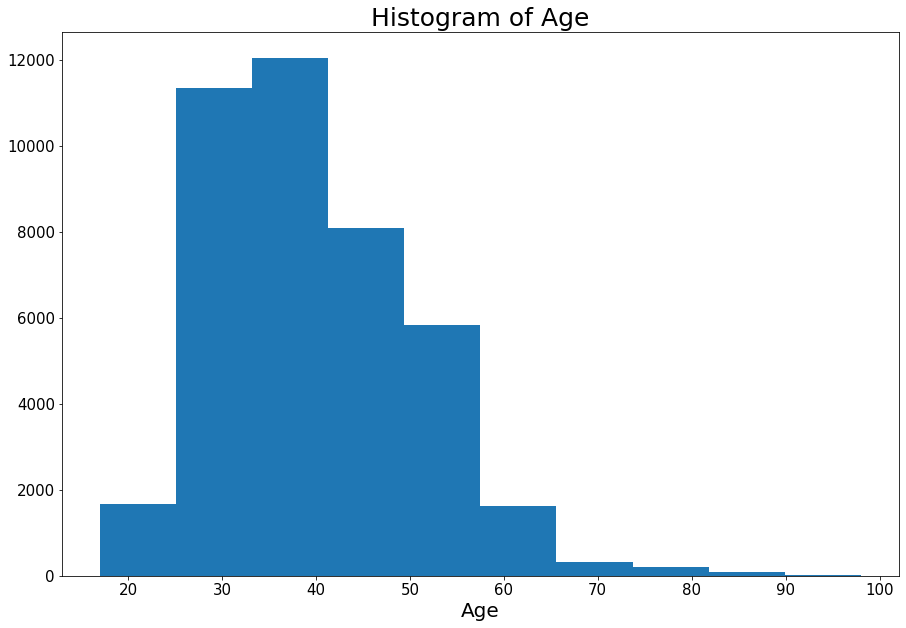

In [5]:
# creating histogram of age
plt.figure(figsize=(15,10))
plt.hist(bank_data['age'])
plt.title('Histogram of Age', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age', fontsize=20)
plt.show()

#### Job               

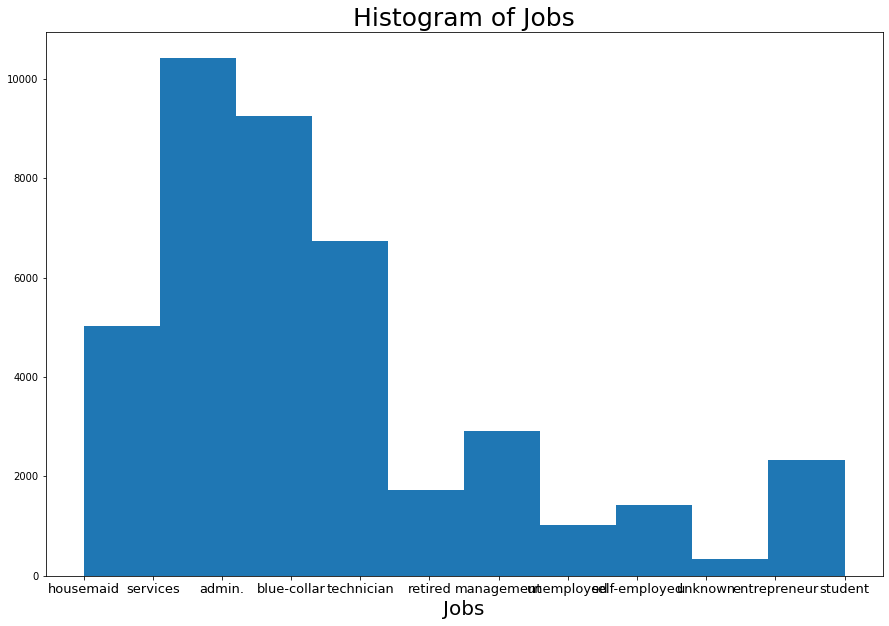

In [6]:
# creating histogram of jobs
plt.figure(figsize=(15,10))
plt.hist(bank_data['job'])
plt.title('Histogram of Jobs', fontsize=25)
plt.xlabel('Jobs', fontsize=20)
plt.xticks(fontsize=13)
plt.show()

#### Marital              

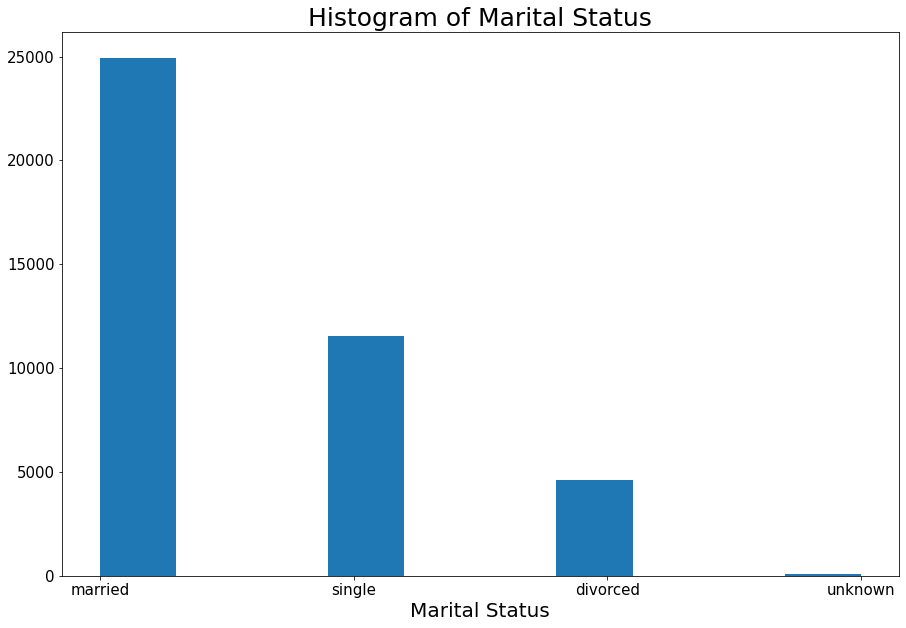

In [7]:
# creating histogram of martial status
plt.figure(figsize=(15,10))
plt.hist(bank_data['marital'])
plt.title('Histogram of Marital Status', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Marital Status', fontsize=20)
plt.show()

#### Education

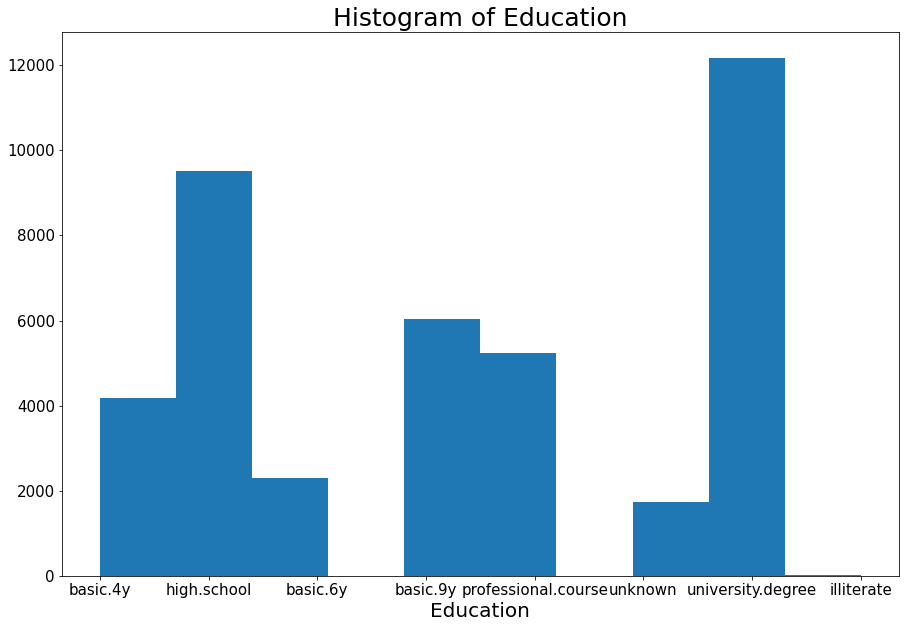

In [8]:
# creating histrogram of education level
plt.figure(figsize=(15,10))
plt.hist(bank_data['education'])
plt.title('Histogram of Education', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Education', fontsize=20)
plt.show()

#### Default

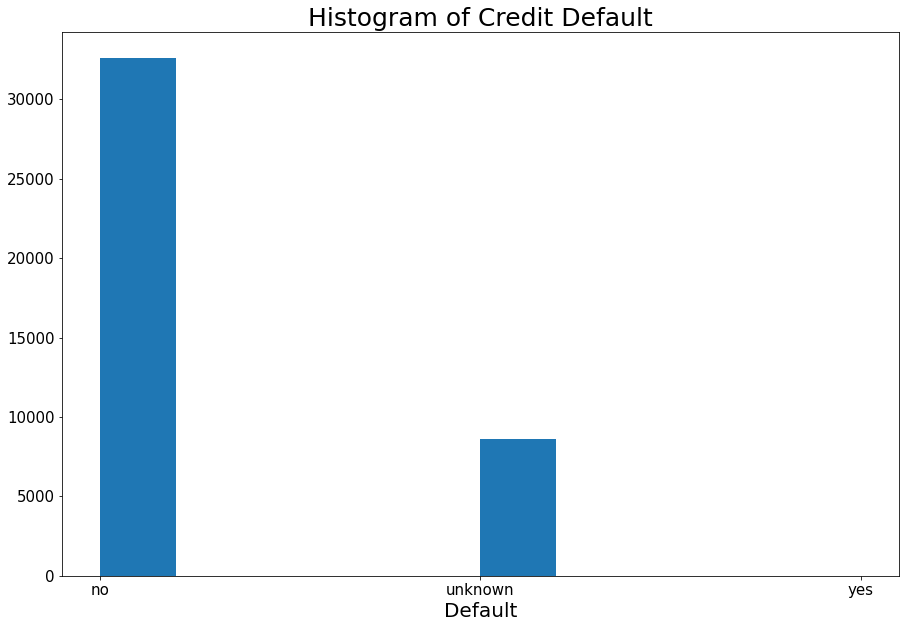

In [9]:
# creating histogram of whether or not credit is in default
plt.figure(figsize=(15,10))
plt.hist(bank_data['default'])
plt.title('Histogram of Credit Default', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Default', fontsize=20)
plt.show()

#### Housing

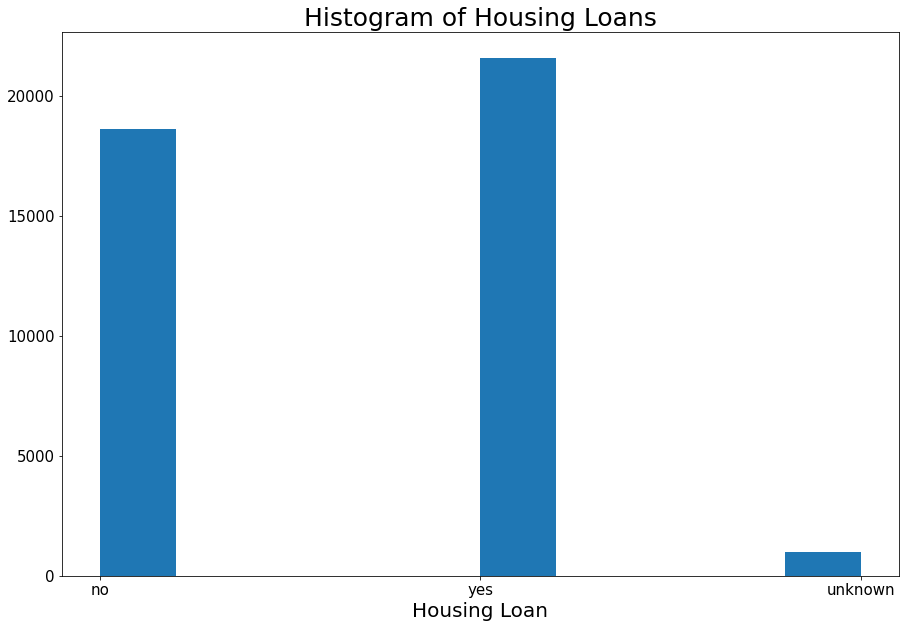

In [10]:
# creating histogram of housing loans
plt.figure(figsize=(15,10))
plt.hist(bank_data['housing'])
plt.title('Histogram of Housing Loans', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Housing Loan', fontsize=20)
plt.show()

#### Loan (history of having a loan)

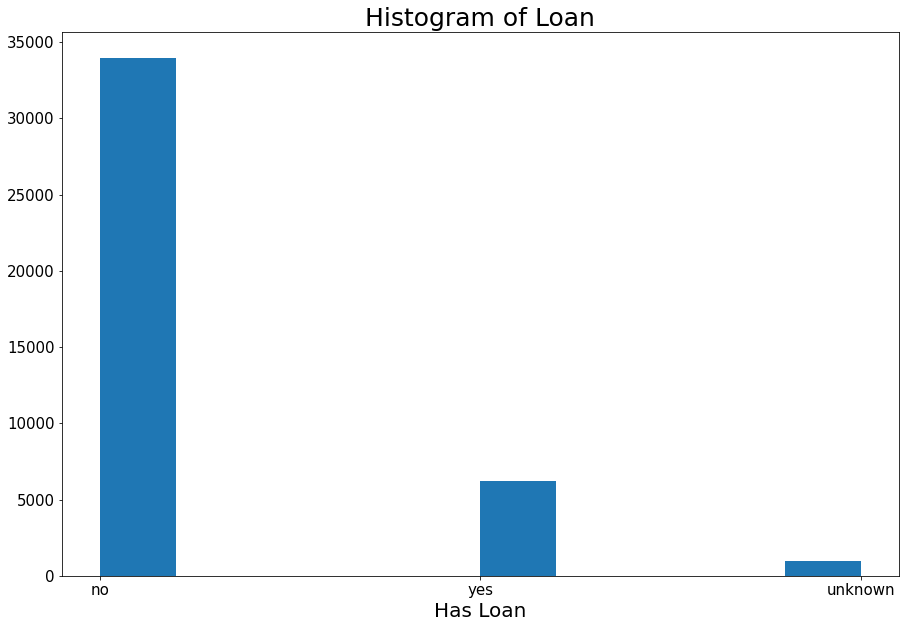

In [11]:
# creating histogram of loan history
plt.figure(figsize=(15,10))
plt.hist(bank_data['loan'])
plt.title('Histogram of Loan', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Has Loan', fontsize=20)
plt.show()

#### Contact (cell vs telephone)

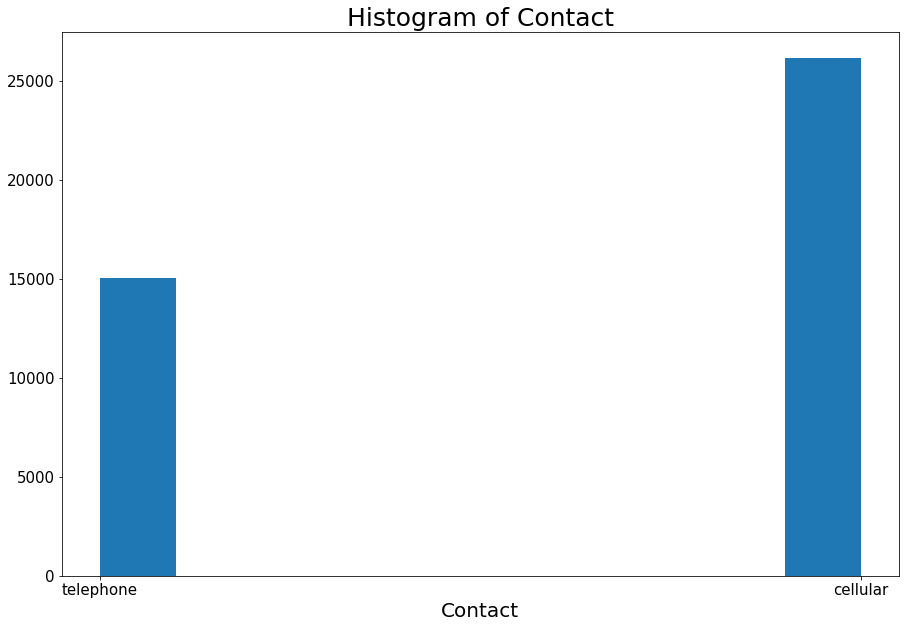

In [12]:
# creating histogram of contact type
plt.figure(figsize=(15,10))
plt.hist(bank_data['contact'])
plt.title('Histogram of Contact', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Contact', fontsize=20)
plt.show()

#### Month

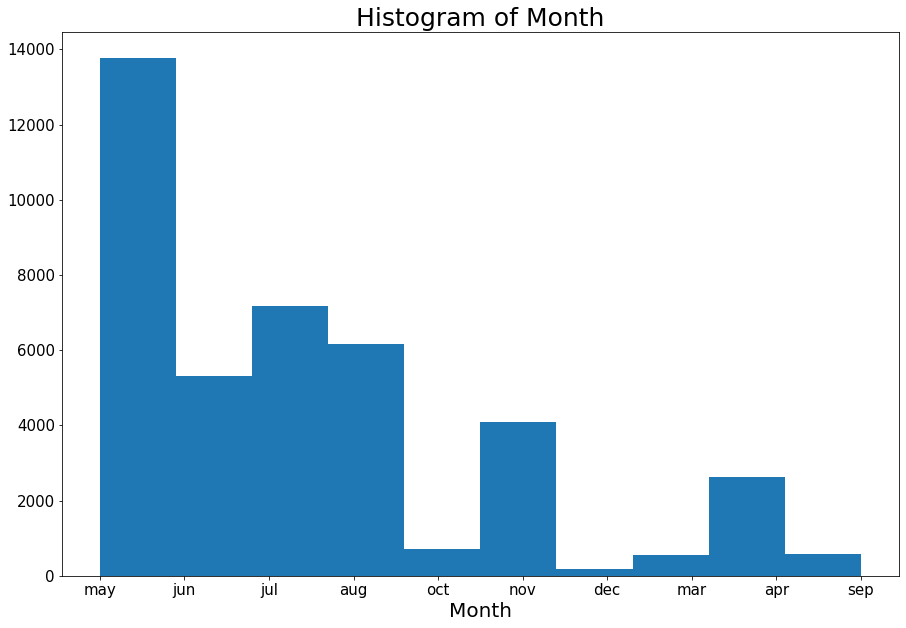

In [13]:
# creating histogram of months
plt.figure(figsize=(15,10))
plt.hist(bank_data['month'])
plt.title('Histogram of Month', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Month', fontsize=20)
plt.show()

#### Day of the Week

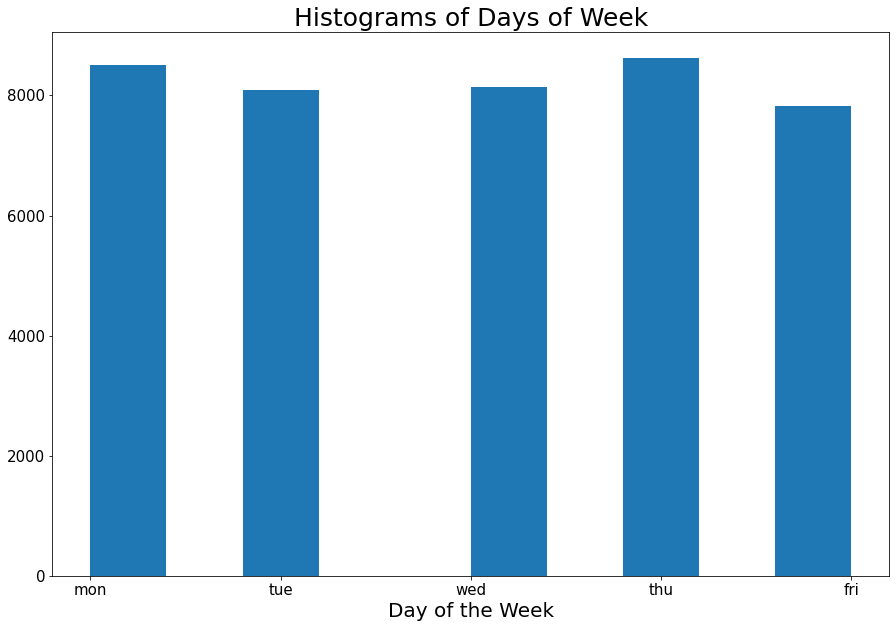

In [14]:
# examination of day_of_week column
plt.figure(figsize=(15,10))
plt.hist(bank_data['day_of_week'])
plt.title('Histograms of Days of Week', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Day of the Week', fontsize=20)
plt.show()

It appears that there each day of the week has a relatively similar number of calls; there is not a single day of the week which outperforms the others.

#### Call Duration

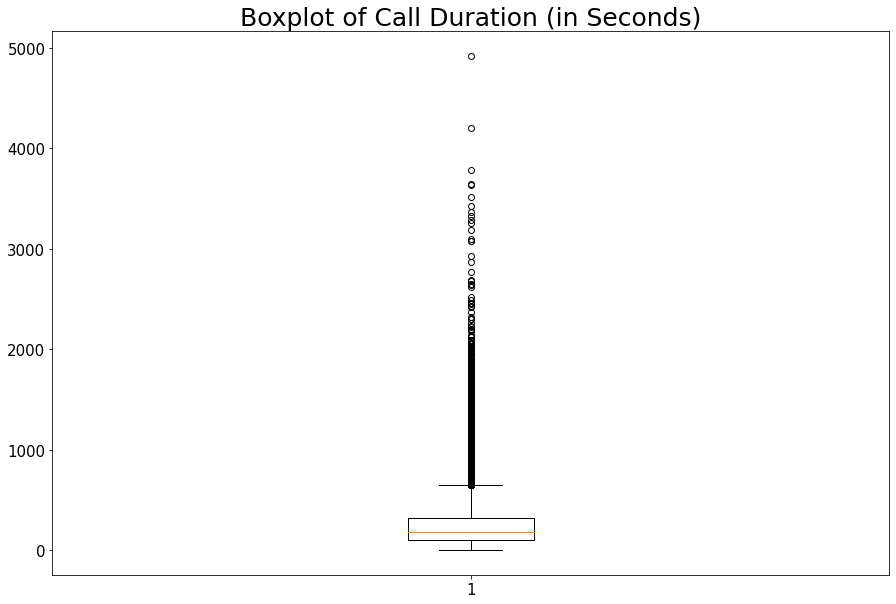

In [15]:
# creating boxplot of call duration
plt.figure(figsize=(15,10))
plt.boxplot(bank_data['duration'])
plt.title('Boxplot of Call Duration (in Seconds)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

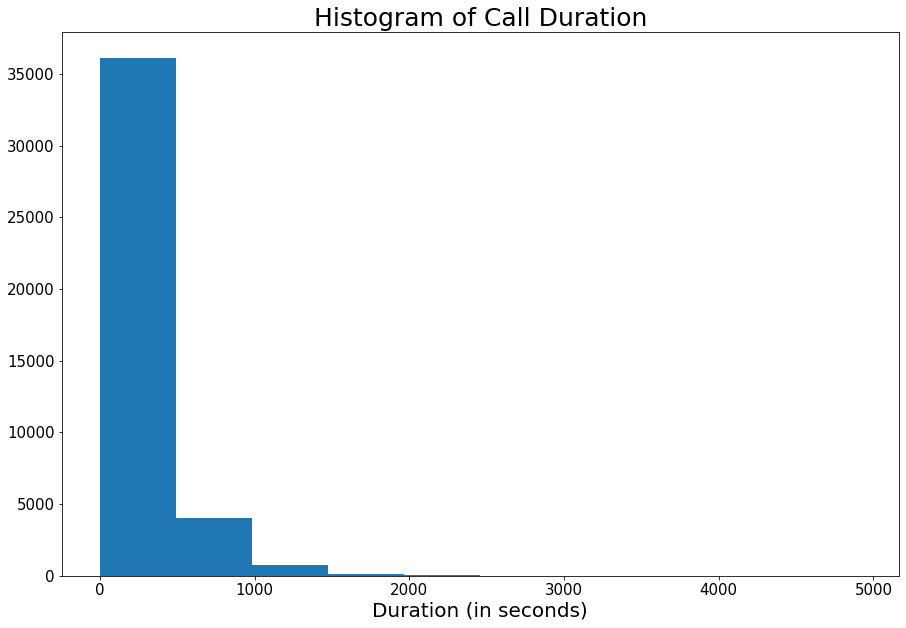

In [16]:
# creating histogram of call duration
plt.figure(figsize=(15,10))
plt.hist(bank_data['duration'])
plt.title('Histogram of Call Duration', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Duration (in seconds)', fontsize=20)
plt.show()

There are a significant number of outliers related to this column and it is right skewed. This is likely due to the majority of calls resulting in no term deposit subscription being close to zero, bringing down the average call time. This would typically need to be addressed prior to model creation, but due to the fact this variable is not known until after the call is completed, it will not be helpful in creating a accurate predictive model. Therefore this feature will be dropped from the dataset after exploration prior to model creation. 

#### Campaign (Number of contacts per client)

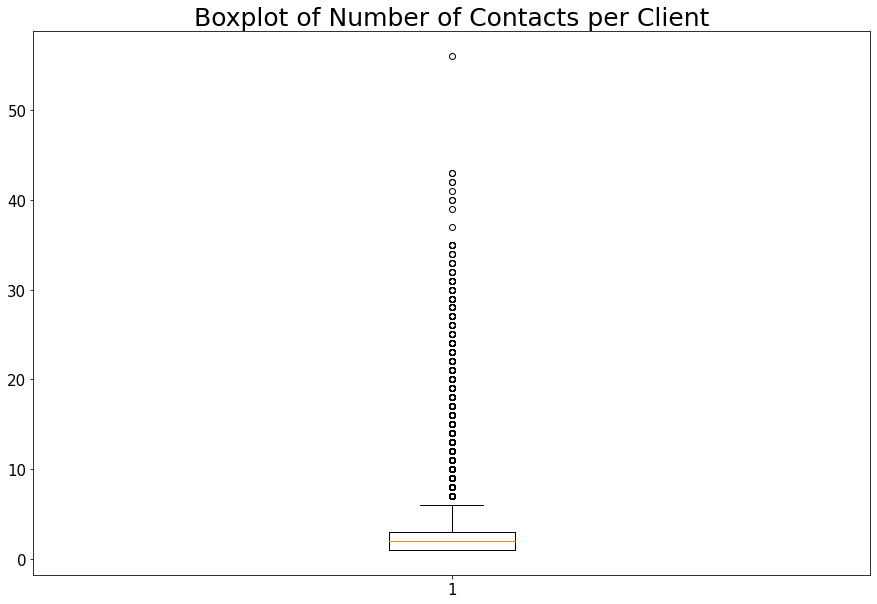

In [17]:
# creating boxplot of campaign
plt.figure(figsize=(15,10))
plt.boxplot(bank_data['campaign'])
plt.title('Boxplot of Number of Contacts per Client', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

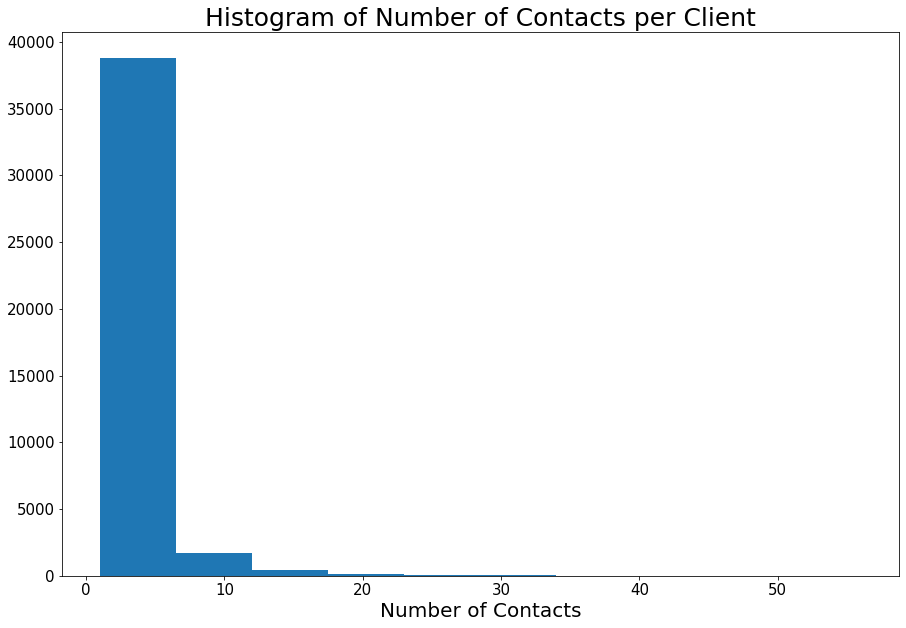

In [18]:
# creating histogram of campaign
plt.figure(figsize=(15,10))
plt.hist(bank_data['campaign'])
plt.title('Histogram of Number of Contacts per Client', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number of Contacts', fontsize=20)
plt.show()

We can see a similar issue, with large numbers of outliers and right-skewed data. It can be assumed that since this is likely due to the majority of customers being relatively new, since the values are a count of every time the client has been contacted. It may be worth further exploration into length of time a client has been with the company to see if this has a greater effect on our predictions. 

#### Pdays (Number of days since last contact of previous campaign)
It is important to note that a client which has not been contacted previously will have a pday value of 999. This will make it difficult to interpret a boxplot due to the large spread. Therefore, a histogram will be utilized to better examine the data.

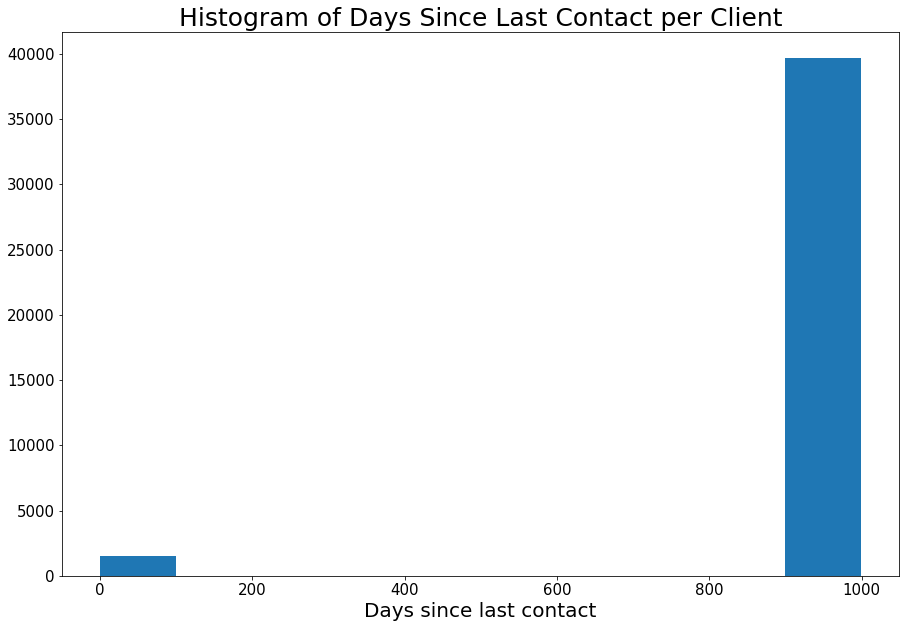

In [19]:
# creating histogram of pdays
plt.figure(figsize=(15,10))
plt.hist(bank_data['pdays'])
plt.title('Histogram of Days Since Last Contact per Client', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Days since last contact', fontsize=20)
plt.show()

As expected, the majority of clients fall into the category of never being contacted, and thus have a value of 999. We will take a closer look at those who have been contacted previously by adjusting our limits. 

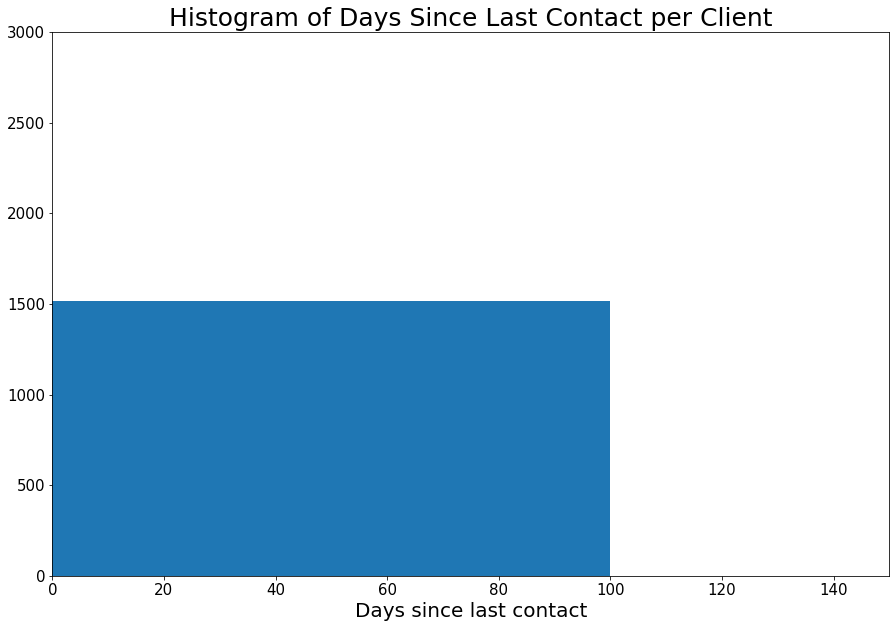

In [20]:
# creating histogram of pdays -previously contacted
plt.figure(figsize=(15,10))
plt.hist(bank_data['pdays'])
plt.title('Histogram of Days Since Last Contact per Client', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Days since last contact', fontsize=20)
plt.xlim(0,150)
plt.ylim(0, 3000)
plt.show()

It appears that all the customers that have been contacted fall within the previous 100 days.

#### Previous (Total number of contacts from previous campaign)

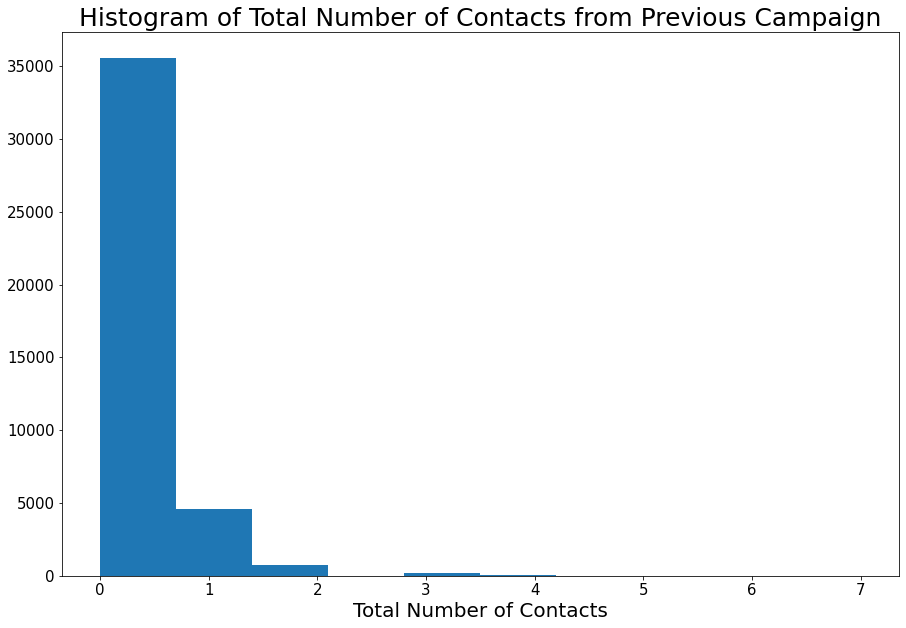

In [21]:
# creating histogram of previous
plt.figure(figsize=(15,10))
plt.hist(bank_data['previous'])
plt.title('Histogram of Total Number of Contacts from Previous Campaign', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total Number of Contacts', fontsize=20)
plt.show()

As expected, based on our previous column, there are a large number of clients who have never been contacted prior, resulting in a right-skewed data set.

#### POutcome (Outcome of previous campaign)

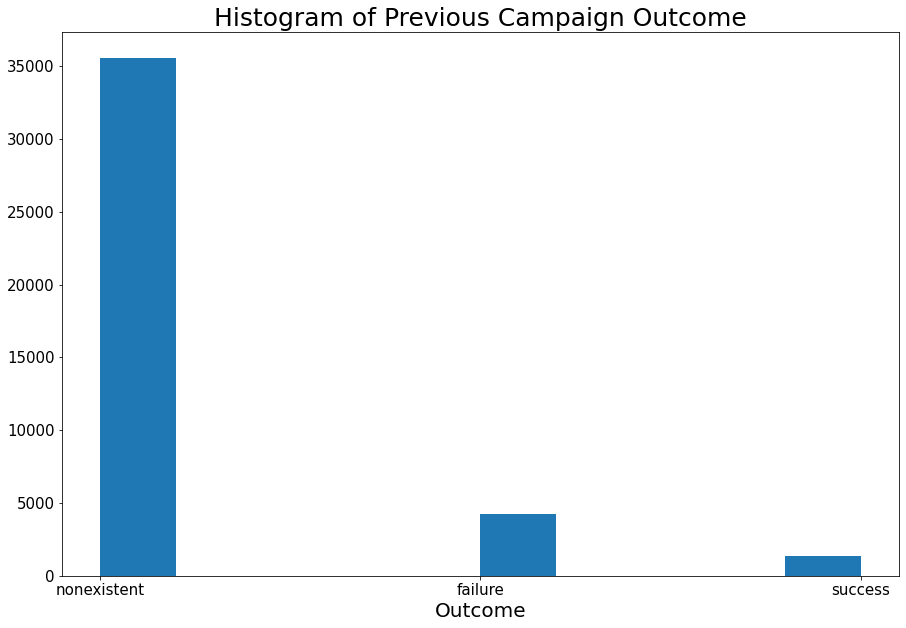

In [22]:
# creating histogram of poutcome
plt.figure(figsize=(15,10))
plt.hist(bank_data['poutcome'])
plt.title('Histogram of Previous Campaign Outcome', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Outcome', fontsize=20)
plt.show()

In [23]:
bank_data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

As we have so many new clients in this dataset, the majority of this column is nonexistent. However, we can see that the majority of the contacts were a failure, at 4252 failures compared to only 1373 successes.

We will now examine the social and economic context attributes

#### Emp.Var.Rate (employment variation rate - quarterly indicator)

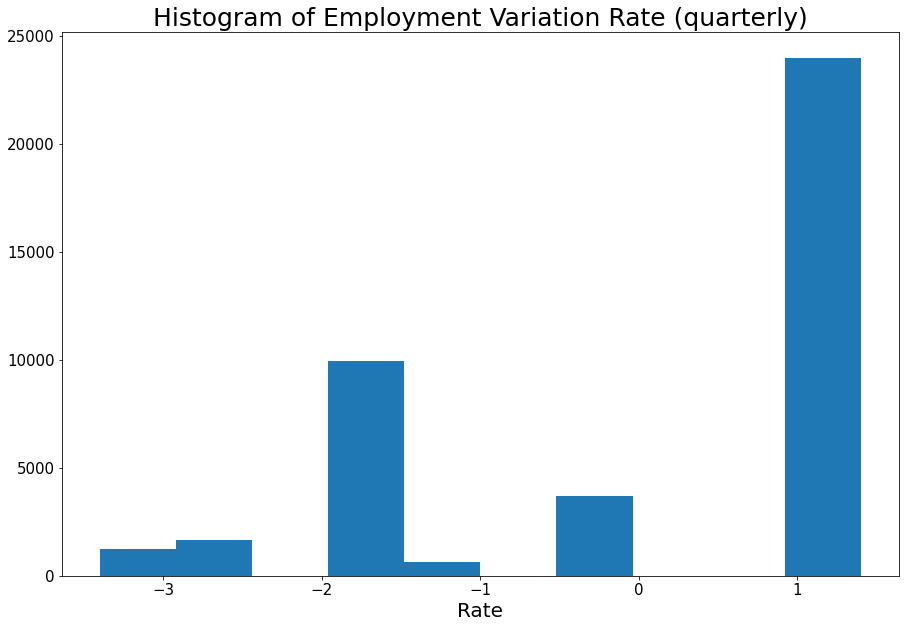

In [24]:
# creating histogram of emp.var.rate
plt.figure(figsize=(15,10))
plt.hist(bank_data['emp.var.rate'])
plt.title('Histogram of Employment Variation Rate (quarterly)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Rate', fontsize=20)
plt.show()

#### Cons.Price.Idx (consumer price index - monthly indicator)

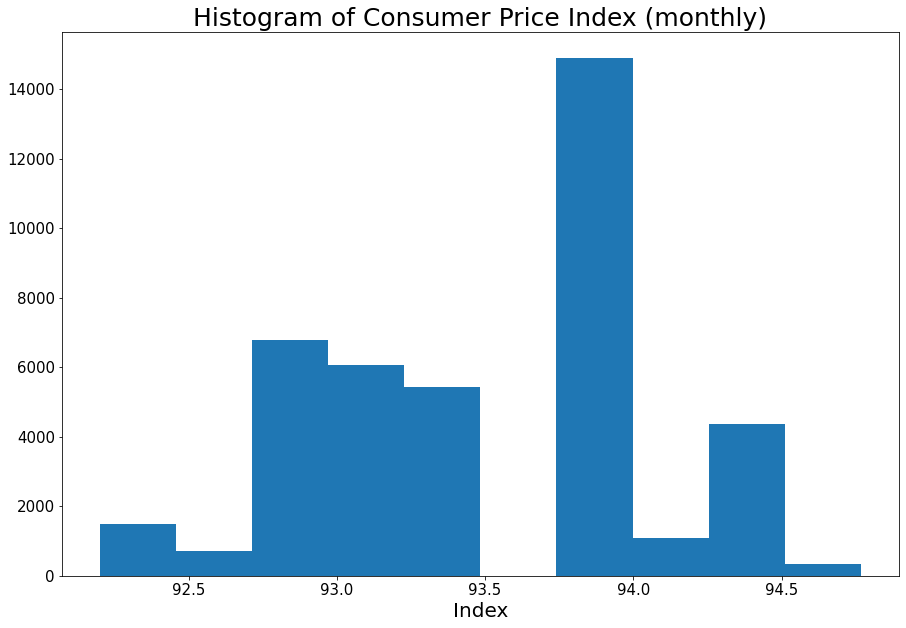

In [25]:
#creating histogram of cons.price.idx
plt.figure(figsize=(15,10))
plt.hist(bank_data['cons.price.idx'])
plt.title('Histogram of Consumer Price Index (monthly)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Index', fontsize=20)
plt.show()

#### Cons.Conf.Idx (consumer confidence index - monthly indicator)

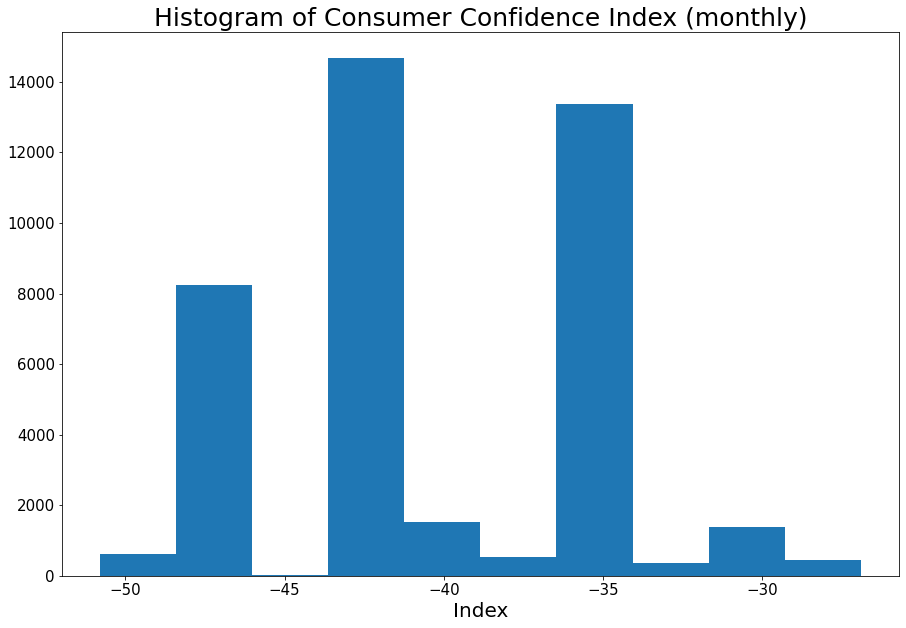

In [26]:
#creating histogram of cons.conf.idx
plt.figure(figsize=(15,10))
plt.hist(bank_data['cons.conf.idx'])
plt.title('Histogram of Consumer Confidence Index (monthly)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Index', fontsize=20)
plt.show()

#### Euribor3m (euribor 3 month rate - daily indicator)

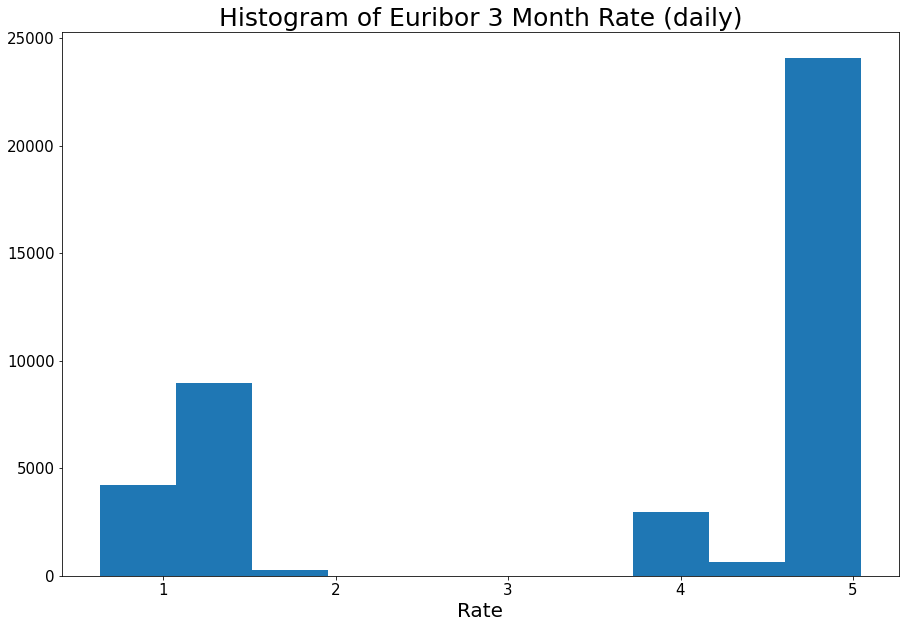

In [27]:
#creating histogram of euribor3m
plt.figure(figsize=(15,10))
plt.hist(bank_data['euribor3m'])
plt.title('Histogram of Euribor 3 Month Rate (daily)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Rate', fontsize=20)
plt.show()

#### Nr.Employed (number of employees - quarterly indicator)

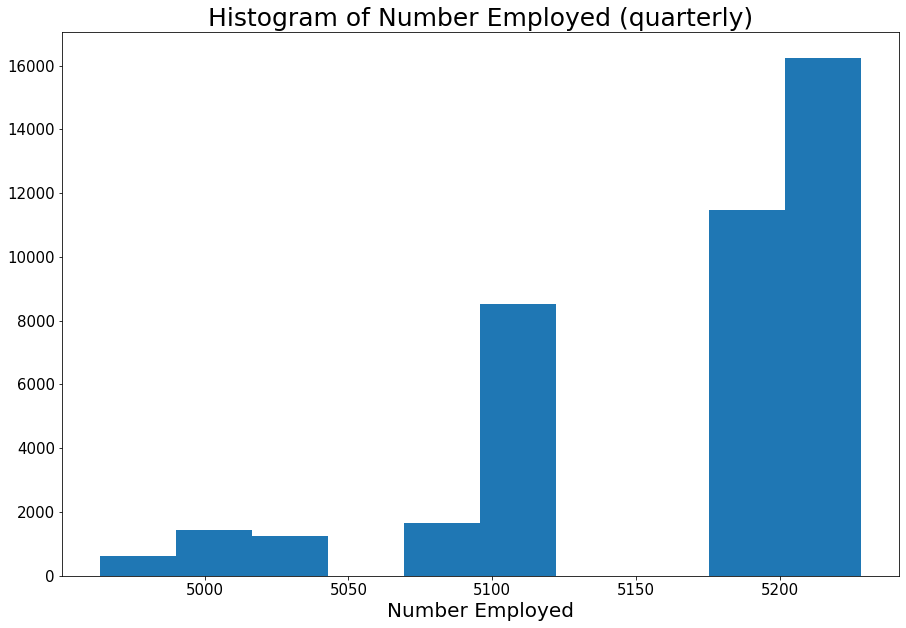

In [28]:
#creating histogram of nr.employed
plt.figure(figsize=(15,10))
plt.hist(bank_data['nr.employed'])
plt.title('Histogram of Number Employed (quarterly)', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Number Employed', fontsize=20)
plt.show()

Overall, all of our social and economic data shows no significant evidence for skew or outliers which will need to be addressed.

#### Y (Whether client subsribed to new term deposit)

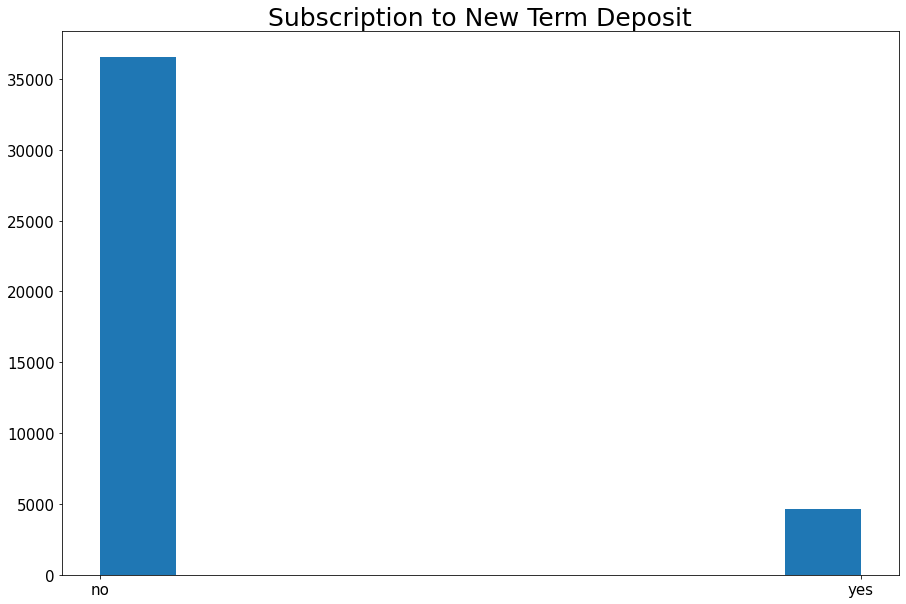

In [29]:
#creating histogram of y
plt.figure(figsize=(15,10))
plt.hist(bank_data['y'])
plt.title('Subscription to New Term Deposit', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [30]:
bank_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Our value count shows a clear class imbalance with approximately 89% of users not subscribing to the term deposit. This may result in issues later on in our model creation, and will need to be addressed. First, we will change this column to a bool value, and change the name to a more recognizable column name of "subscribed".

In [31]:
bank_data['subscribed'] = pd.Series(map(lambda x: dict(yes=1, no=0)[x], bank_data.y.values.tolist()), bank_data.index)
bank_data.drop(columns='y', inplace=True)

In [32]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Now we will examine the correlation matrix of our numeric data and target to see if there are any strong correlations between our columns.

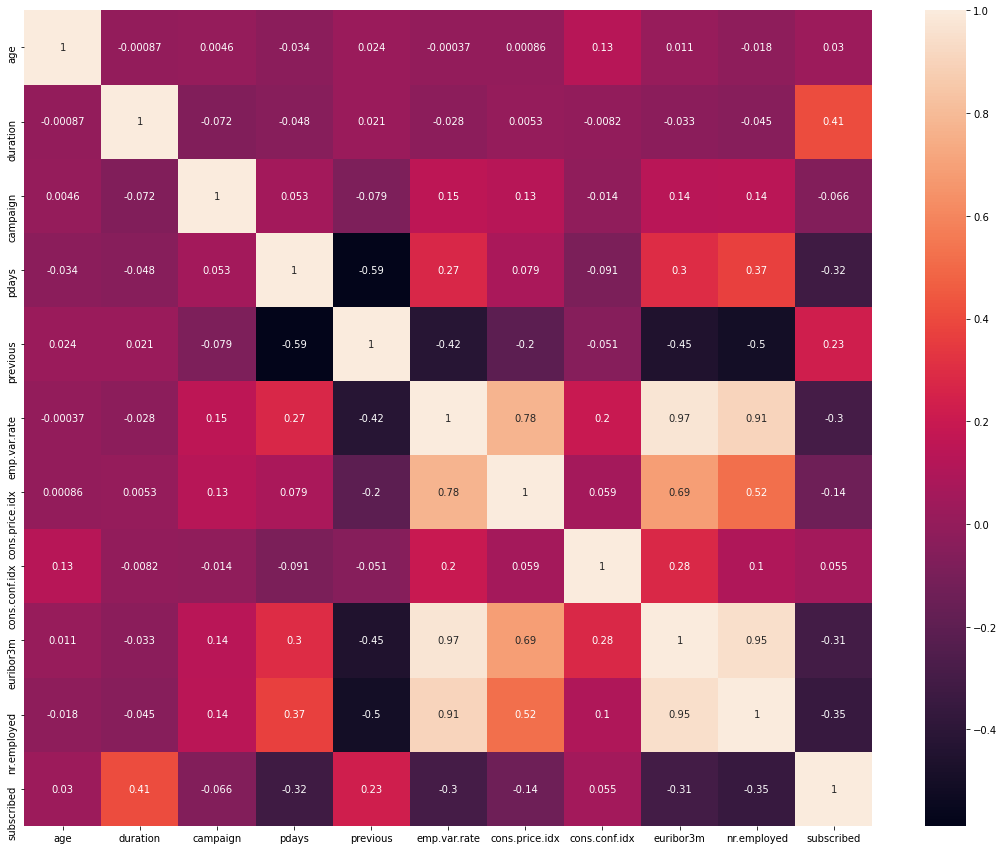

In [33]:
corr_matrix = bank_data.corr()
plt.figure(figsize=(19,15))
sns.heatmap(corr_matrix, annot=True)
plt.show()

We can see that there is no significant correlation between any of our columns and our target. We can see that there is significant correlation between our economic variables, which is to be expected as they are all based on current economic trends. We will also examine a scatter matrix of this data.

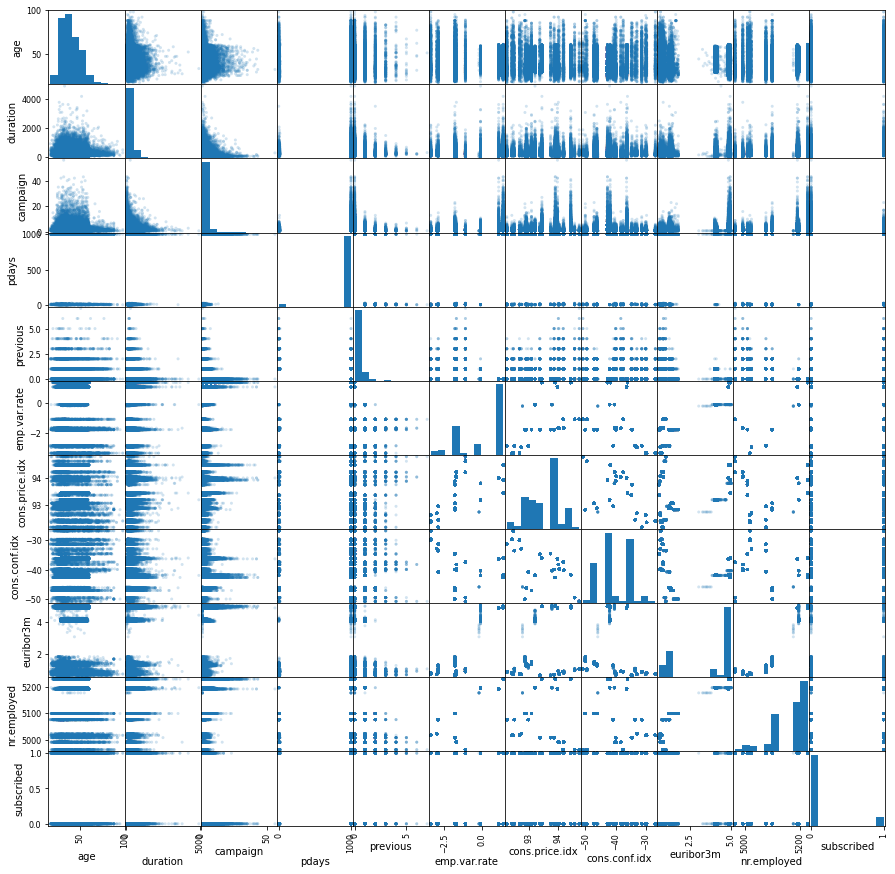

In [34]:
pd.plotting.scatter_matrix(bank_data, alpha=0.2, figsize=(15,15))
plt.show()

## Model Preparation
We will begin with preparing our data to be used by the models. Since all our models require categorical data to be encoded, we will use OHE via the pd.get_dummies method as this model is not a online deployed model. We will start by dropping our duration column, as this column would not be able to be used in a true predictive model taking into account data leakage considerations.

In [35]:
model_data = bank_data.drop(columns= ['duration'])
# getting dummies and dropping the necessary columns
model_data = pd.get_dummies(model_data, drop_first=True) 
model_data.head() # viewing encoded data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


Next, we will split our data into train, test, and validation sets.

In [36]:
features= model_data.drop(columns= ['subscribed']) # defining features
target = model_data['subscribed'] # defining target

features_train, features_rem, target_train, target_rem = train_test_split(features, target, train_size=0.6, random_state=12345)
# Now since we want the valid and test size to be equal (20% each of overall data). 
# We have to define valid_size=0.5 (that is 50% of remaining data).
test_size = 0.5
features_valid, features_test, target_valid, target_test = train_test_split(features_rem, target_rem, test_size=0.5, random_state=12345)

Now we will create a function to upsample our data via copying in order to address the issue of the class imbalance of our target column. 

In [37]:
def upsample(features, target, repeat): # creating function to upsample our data to address class imbalance
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    # The records of each class of our label variable are isolated. 

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    # We merge the records back but repeat the minority class records.

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)

We will also create a scoring function to be used in evaluating our model

In [38]:
def score_model(model, features, target): # creating our scoring function
    probabilities = model.predict_proba(features)
    probabilities_one = probabilities[:, 1]
    predictions = model.predict(features)

    auc_roc = roc_auc_score(target, probabilities_one) # AUC-ROC score

    print(f'Area Under Curve ROC: {round(auc_roc,2)}') # AUC-ROC score
    print('Accuracy Score: ', accuracy_score(target, predictions)) # Accuracy Score
    print(f'K-folds Cross Validation across 10 folds: \n {cross_val_score(model, features, target, cv=10, n_jobs=1)}')
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15,5)
    ax1.set_title('Confusion Matrix', fontdict={'fontsize':20})
    ax2.set_title('Precision vs Recall', fontdict={'fontsize':20})
    print(classification_report(target, predictions))
    ConfusionMatrixDisplay.from_predictions(target, predictions, ax=ax1)
    PrecisionRecallDisplay.from_predictions(target, predictions, ax=ax2)

    fpr, tpr, thresholds = roc_curve(target, probabilities_one) # graphing ROC curve

    plt.figure(figsize=(15,6))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', size=15)
    plt.ylabel('True Positive Rate', size=15)
    plt.title('ROC curve', size=25)
    plt.show() 

## Model Creation

### Logistic Regression
Our first model will be Logistic Regression, which we will train regularly, as well as with our upsampled and downsampled data. We will select the best model based on its accuracy score based on the validation set for final testing.

#### Regular Data

In [39]:
model_LR = LogisticRegression()
model_LR.fit(features_train, target_train)
predicted_valid = model_LR.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.8999757222626851


#### Upsampled Data

In [40]:
model_LR_u = LogisticRegression()
model_LR_u.fit(features_upsampled, target_upsampled)
predicted_valid = model_LR_u.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.7168001942218986


We can see that the logistic regression model using the regular data performed better. We will select this model for final testing.

### Decision Tree
Now we will utilize the Decision Tree model. We will start by tuning the hyperparameter of max_depth, then as before will fit it for our regular data and upsampled data. In addition, we will test setting the class_weight parameter to balanced to see if it performs better.

#### Tuning Hyperparameters

In [41]:
max_list = [] #writing loop to test for highest accuracy from 1-5
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train)   
    predictions_valid = model.predict(features_valid)
    max_list.append(accuracy_score(target_valid, predictions_valid))
max_value = max(max_list) #finding max_score
max_depth_number = max_list.index(max_value) +1 #returning depth at which max score occurs
print(max_depth_number)

5


We can see that our model performed best at a max_depth of 5, so we will use this for our model creation.

#### Regular Data

In [42]:
model_tree = DecisionTreeClassifier(random_state=12345, max_depth=5) #creating the model
model_tree.fit(features_train, target_train) #training the model with the test set
predicted_valid = model_tree.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.8996115562029618


#### Upsampled Data

In [43]:
model_tree_u = DecisionTreeClassifier(random_state=12345, max_depth=5) #creating the model
model_tree_u.fit(features_upsampled, target_upsampled) #training the model with the test set
predicted_valid = model_tree_u.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.8075989317795581


#### Balanced Data

In [44]:
model_tree_b = DecisionTreeClassifier(random_state=12345, max_depth=5, class_weight='balanced') #creating the model
model_tree_b.fit(features_train, target_train) #training the model with the test set
predicted_valid = model_tree_b.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.8075989317795581


Our decision tree using the regular data performed best, we will select this for final testing.

### Random Forest
For this model, we will tune the hyperparameter of n_estimators, then will train similar to our decision tree from above.

#### Tuning Hyperparameters

In [45]:
max_list = []
for n_estimators in range(1, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=n_estimators, n_jobs=1)
    model.fit(features_train, target_train)   
    predictions_valid = model.predict(features_valid)
    max_list.append(accuracy_score(target_valid, predictions_valid))
max_value = max(max_list)
n_estimators_number = max_list.index(max_value) +1
print(n_estimators_number)

44


We will use n_estimators=44 to train our model.

#### Regular Data

In [46]:
model_forest = RandomForestClassifier(random_state=12345, n_estimators=44)
model_forest.fit(features_train, target_train)
predicted_valid = model_forest.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.8953629521728574


#### Balanced Data

In [47]:
model_forest_b = RandomForestClassifier(random_state=12345, n_estimators=6, class_weight='balanced')
model_forest_b.fit(features_train, target_train)
predicted_valid = model_forest_b.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.8883224083515416


#### Upsampled data

In [48]:
model_forest_u = RandomForestClassifier(random_state=12345, n_estimators=9)
model_forest_u.fit(features_upsampled, target_upsampled) #training the model with the test set
predicted_valid = model_forest_u.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.8725418790968682


The model performed slightly better with the regular data than the balanced data, so we will use this model in final testing.

### XGBoost 
For this model, we will tune the hyperparameters of n_estimators and max_depth. Then we will train with our regular data and upsampled data.

#### Tuning Hyperparameters

In [49]:
max_list = []
for n_estimators in range(1, 10):
    model = XGBClassifier(n_estimators=n_estimators, eval_metric='logloss', random_state=12345)
    model.fit(features_train, target_train)   
    predictions_valid = model.predict(features_valid)
    max_list.append(accuracy_score(target_valid, predictions_valid))
max_value = max(max_list)
max_number = max_list.index(max_value) 
print(max_number)

5


In [50]:
max_list = []
for depth in range(1, 5):
    model = XGBClassifier(n_estimators=5, max_depth=depth, eval_metric='logloss', random_state=12345)
    model.fit(features_train, target_train)   
    predictions_valid = model.predict(features_valid)
    max_list.append(accuracy_score(target_valid, predictions_valid))
max_value = max(max_list)
max_number = max_list.index(max_value) -1
print(max_number)

2


This model appears to perform best with an n_estimators=5, and max_depth=2.

#### Regular Data

In [51]:
model_xgb = XGBClassifier(n_estimators=5, max_depth=2, eval_metric='logloss', random_state=12345)
model_xgb.fit(features_train, target_train)
predicted_valid = model_xgb.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.899368778829813


#### Upsampled Data

In [52]:
model_xgb_u = XGBClassifier(n_estimators=5, max_depth=2, eval_metric='logloss', random_state=12345)
model_xgb_u.fit(features_upsampled, target_upsampled)
predicted_valid = model_xgb_u.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.7969167273610099


This model performed best with the regular data.

### CatBoost
For this model we will tune the max_depth hyperparameter. Then we will fit the model to our regular data and upsampled data.

#### Tuning Hyperparameters

In [53]:
max_list =[]
for depth in range(1, 10):
    model = CatBoostClassifier(iterations=10, max_depth=depth, verbose=False, random_state=12345)
    model.fit(features_train, target_train)   
    predictions_valid = model.predict(features_valid)
    max_list.append(accuracy_score(target_valid, predictions_valid))
max_value = max(max_list)
max_depth_number = max_list.index(max_value) + 1
print(max_depth_number)

7


For this model we will utilize a max_depth of 7.

#### Regular Data

In [54]:
model_cat = CatBoostClassifier(iterations=10, max_depth=7, verbose=False, random_state=12345)
model_cat.fit(features_train, target_train)
predicted_valid = model_cat.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.9005826656955572


#### Upsampled Data

In [55]:
model_cat_u = CatBoostClassifier(iterations=10, max_depth=7, verbose=False, random_state=12345)
model_cat_u.fit(features_upsampled, target_upsampled) #training the model with the upsampled data
predicted_valid = model_cat_u.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.7957028404952659


This model performed best with the regular data.

### Support Vector Machines
Our final model will be Support Vector Machines, which we will train regularly, as well as with our upsampled data. We will select the best model based on its accuracy score based on the validation set for final testing.

#### Regular Data

In [56]:
model_svm = svm.SVC(probability=True, random_state=12345)
model_svm.fit(features_train, target_train)
predicted_valid = model_svm.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.8974265598446225


#### Upsampled Data

In [57]:
model_svm_u = svm.SVC(random_state=12345)
model_svm_u.fit(features_upsampled, target_upsampled)
predicted_valid = model_svm_u.predict(features_valid)
print('Accuracy:', accuracy_score(target_valid, predicted_valid))

Accuracy: 0.7186210245205147


This model performed best with the regular data.

## Model Testing
We will now move onto our final testing for each model we selected above. We will utilize our scoring model that we created which will give us the AUC-ROC score, accuracy score, classification report, confusion matrix, precision vs recall graph and show our ROC curve. We will compare our models and select the one which performs the best.

### Logistic Regression

Area Under Curve ROC: 0.76
Accuracy Score:  0.8968196164117505
K-folds Cross Validation across 10 folds: 
 [0.89563107 0.88713592 0.89927184 0.89563107 0.90776699 0.89441748
 0.90169903 0.89684466 0.89428919 0.89307412]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7283
           1       0.70      0.19      0.30       955

    accuracy                           0.90      8238
   macro avg       0.80      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



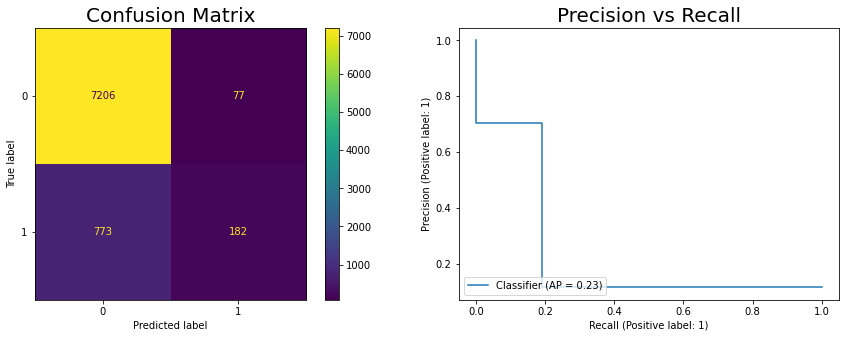

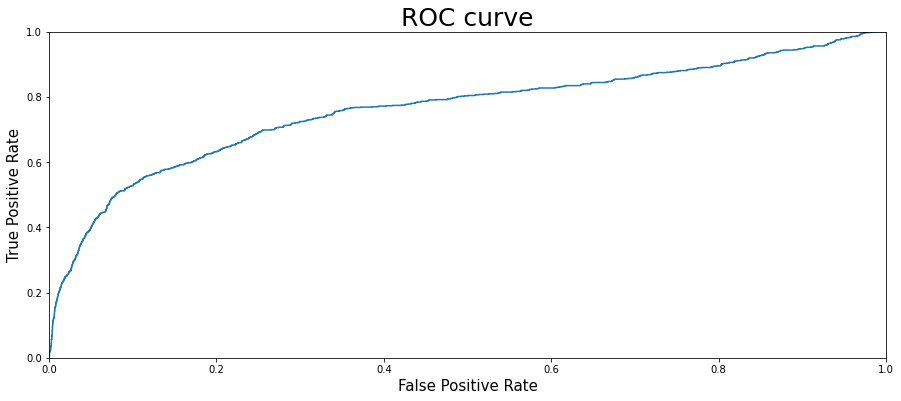

In [58]:
score_model(model_LR, features_test, target_test)

### Decision Tree

Area Under Curve ROC: 0.77
Accuracy Score:  0.8962126729788784
K-folds Cross Validation across 10 folds: 
 [0.89563107 0.87985437 0.89563107 0.88956311 0.89441748 0.8907767
 0.89684466 0.89199029 0.89914945 0.89307412]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7283
           1       0.61      0.29      0.40       955

    accuracy                           0.90      8238
   macro avg       0.76      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238



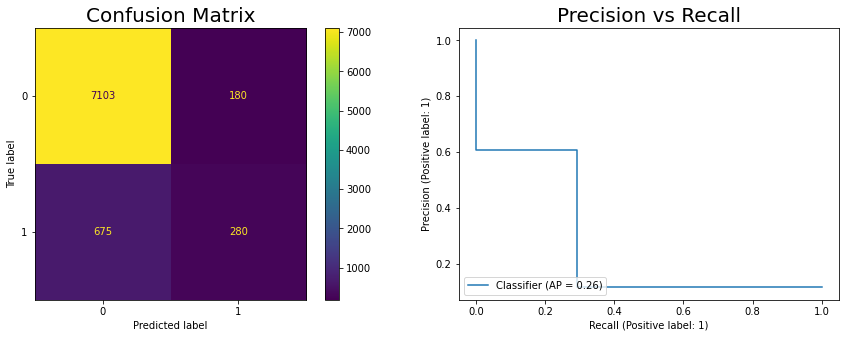

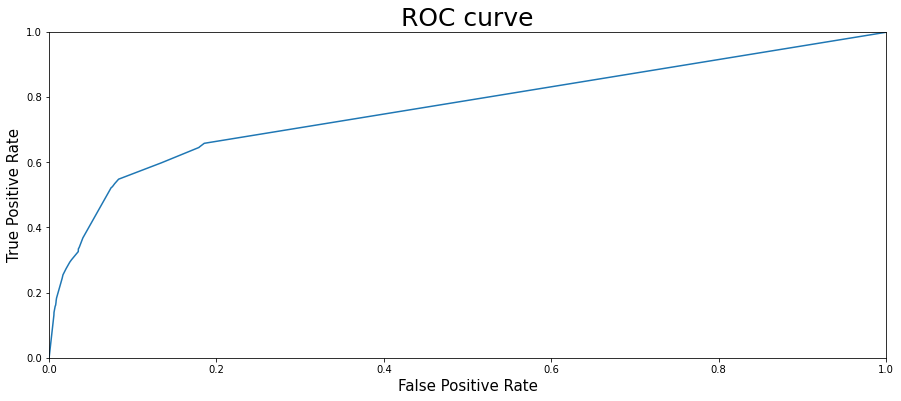

In [59]:
score_model(model_tree, features_test, target_test)

### Random Forest

Area Under Curve ROC: 0.77
Accuracy Score:  0.890507404709881
K-folds Cross Validation across 10 folds: 
 [0.88956311 0.88470874 0.89320388 0.88349515 0.89199029 0.90776699
 0.88470874 0.89320388 0.89793439 0.88335358]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7283
           1       0.56      0.27      0.36       955

    accuracy                           0.89      8238
   macro avg       0.73      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238



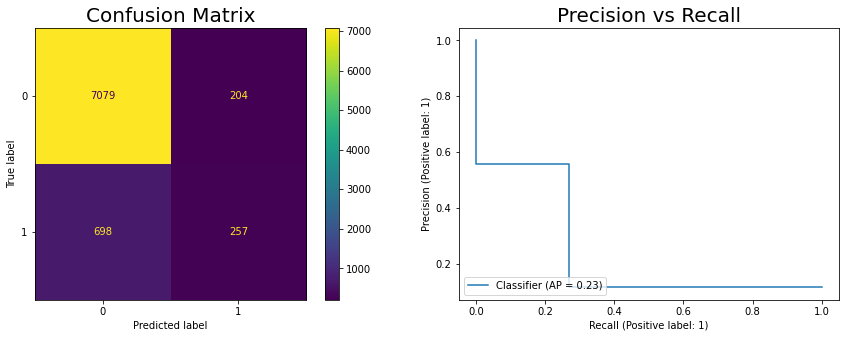

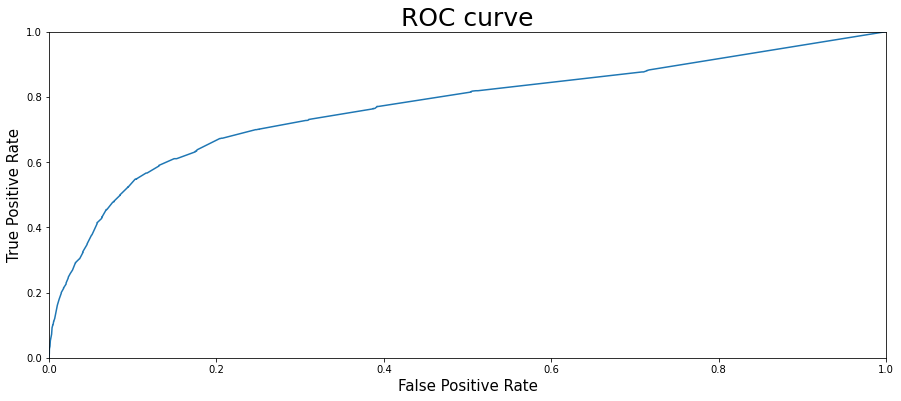

In [60]:
score_model(model_forest, features_test, target_test)

### XGBoost

Area Under Curve ROC: 0.77
Accuracy Score:  0.8962126729788784
K-folds Cross Validation across 10 folds: 
 [0.89441748 0.88713592 0.90169903 0.89563107 0.89684466 0.89320388
 0.90169903 0.89805825 0.89793439 0.89064399]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7283
           1       0.71      0.18      0.28       955

    accuracy                           0.90      8238
   macro avg       0.81      0.58      0.61      8238
weighted avg       0.88      0.90      0.87      8238



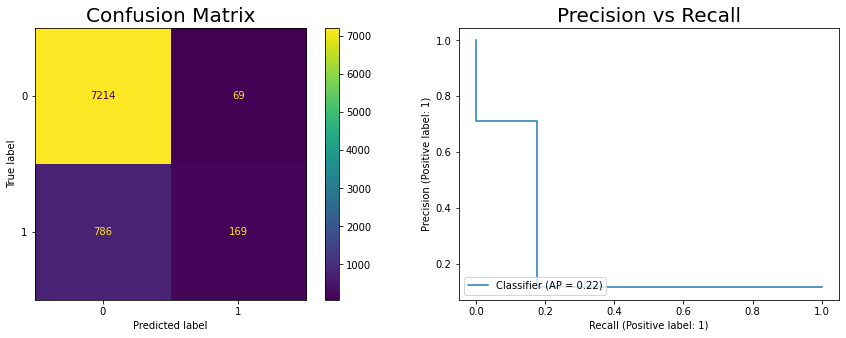

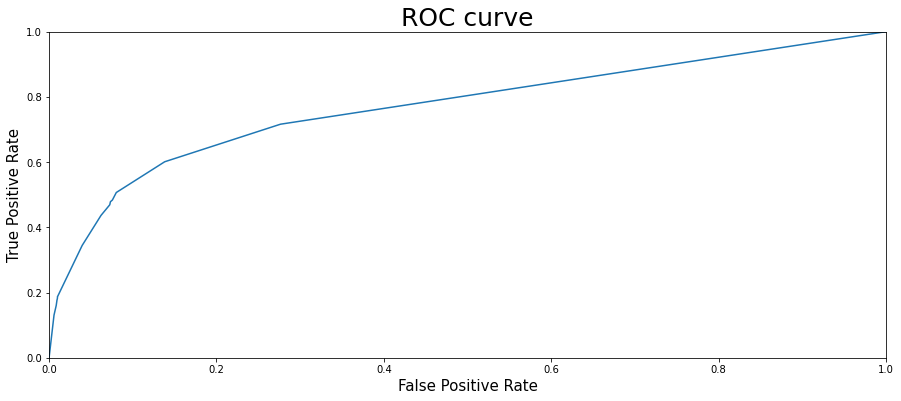

In [61]:
score_model(model_xgb, features_test, target_test)

### CatBoost

Area Under Curve ROC: 0.79
Accuracy Score:  0.8947560087399854
K-folds Cross Validation across 10 folds: 
 [0.90169903 0.88713592 0.88592233 0.88956311 0.89805825 0.88713592
 0.89199029 0.89805825 0.89550425 0.88578372]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7283
           1       0.61      0.25      0.36       955

    accuracy                           0.89      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.87      0.89      0.87      8238



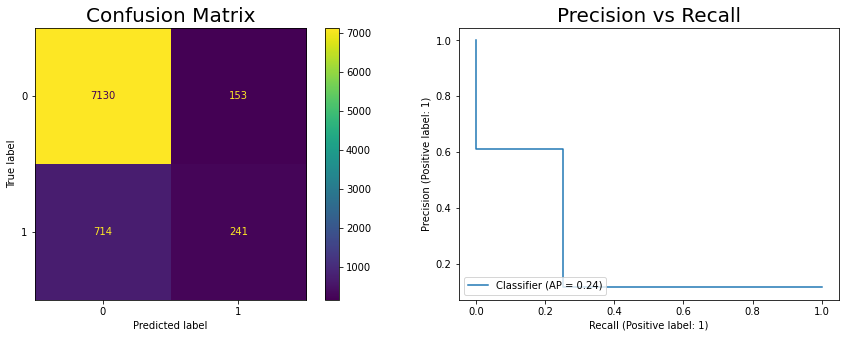

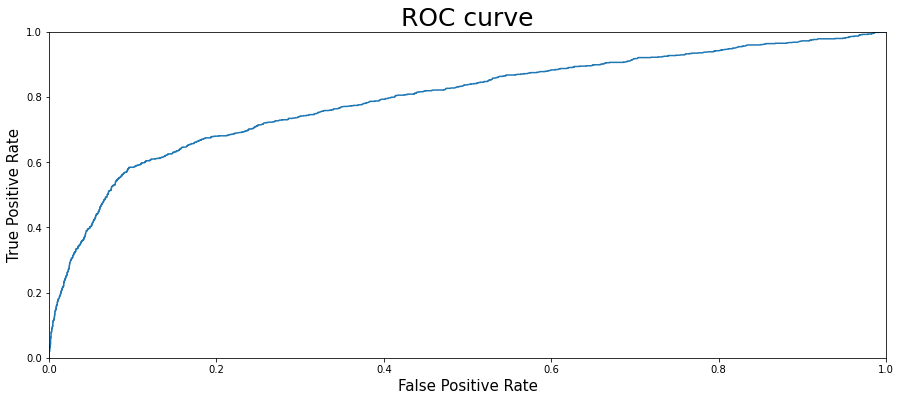

In [62]:
score_model(model_cat, features_test, target_test)

### Support Vector Machines


Area Under Curve ROC: 0.64
Accuracy Score:  0.8959698956057296
K-folds Cross Validation across 10 folds: 
 [0.89805825 0.88470874 0.90291262 0.89805825 0.90048544 0.89563107
 0.90412621 0.89199029 0.89671932 0.88699878]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      7283
           1       0.66      0.21      0.32       955

    accuracy                           0.90      8238
   macro avg       0.78      0.60      0.63      8238
weighted avg       0.88      0.90      0.87      8238



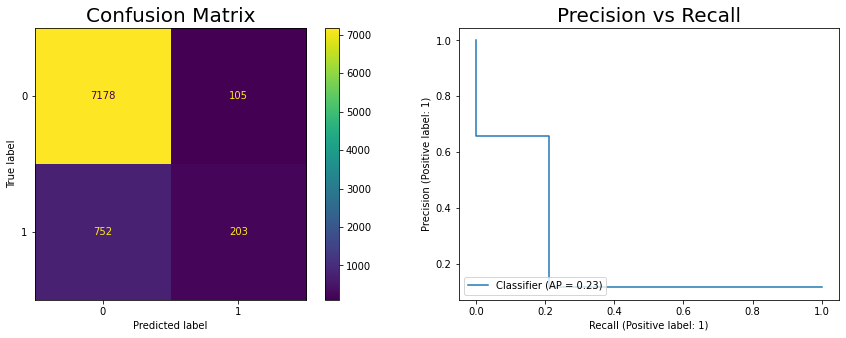

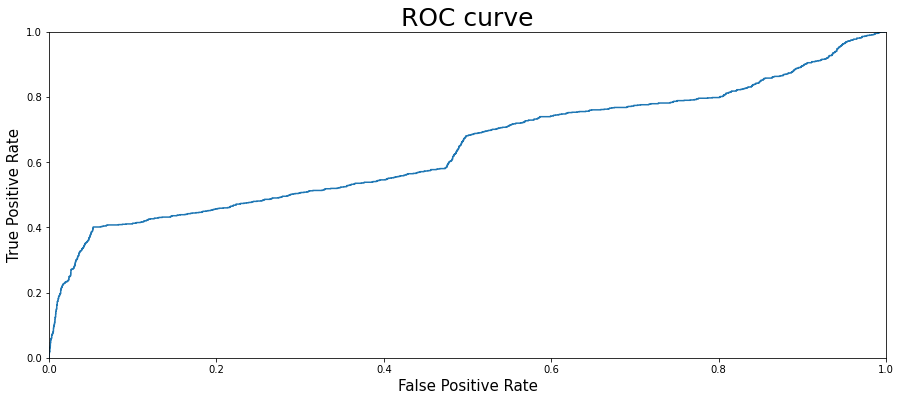

In [63]:
score_model(model_svm, features_test, target_test)

Overall, we have some models which have performed very well. The Logistic classifier was the most accurate but suffered in other metrics, such as recall. Because we want to maximize the number of conversions, recall should be prioritized over precision. Our CatBoost model performed the best, with an AUC-ROC score of 0.79 and accuracy score of 0.89. This is the model we will select to utilize for future marketing efforts to focus on those most likely to subscribe. We will try an advanced oversampling method called SMOTE(Synthetic Minority Oversampling Technique) in order to generate new data that is not merely a copy of other records. 

Area Under Curve ROC: 0.97
Accuracy Score:  0.9186730506155951
K-folds Cross Validation across 10 folds: 
 [0.90766074 0.89808482 0.9124487  0.91928865 0.89261286 0.89192886
 0.91108071 0.90492476 0.91860465 0.89192886]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7349
           1       0.94      0.89      0.92      7271

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



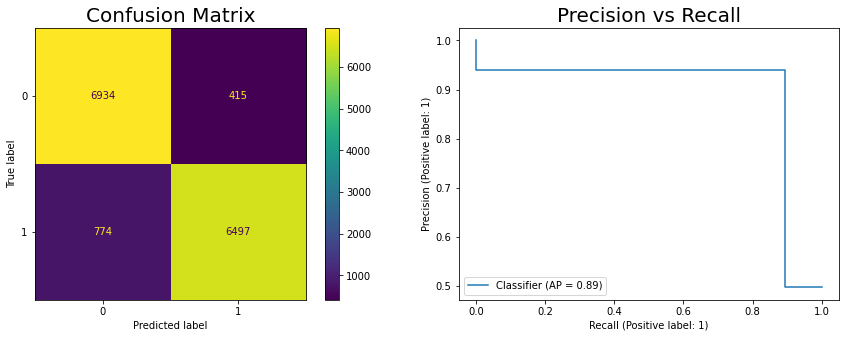

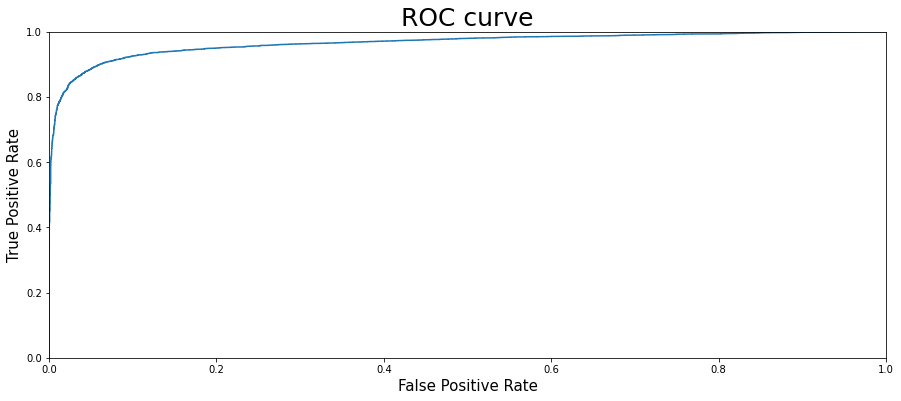

In [64]:
over_sample = SMOTE()
X, y = over_sample.fit_resample(features, target) # New upsampled features and labels are created.
model_cat_over_sample = CatBoostClassifier(verbose=False, random_state=12345)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)
model_cat_over_sample.fit(X_train, y_train)
score_model(model_cat_over_sample, X_test, y_test)

The new data actually works. We are now seeing much higher recall, significant increase in the AUC-ROC score, slightly better accuracy as well as good generalization from the K-folds cross validation. 